# Clustering

## Agenda:

1. K-means clustering
2. Clustering evaluation
3. DBSCAN clustering

In [36]:
# beer dataset
import pandas as pd
url = 'https://raw.githubusercontent.com/justmarkham/DAT8/master/data/beer.txt'
beer = pd.read_csv(url, sep=' ')
beer

,name,calories,sodium,alcohol,cost
0,Budweiser,144,15,4.7,0.43
1,Schlitz,151,19,4.9,0.43
2,Lowenbrau,157,15,0.9,0.48
3,Kronenbourg,170,7,5.2,0.73
4,Heineken,152,11,5.0,0.77
5,Old_Milwaukee,145,23,4.6,0.28
6,Augsberger,175,24,5.5,0.40
7,Srohs_Bohemian_Style,149,27,4.7,0.42
8,Miller_Lite,99,10,4.3,0.43
9,Budweiser_Light,113,8,3.7,0.40


How would you cluster these beers?

In [101]:
# TODO - define X
X = beer.drop('name', axis=1)
X

,calories,sodium,alcohol,cost,cluster
0,144,15,4.7,0.43,0
1,151,19,4.9,0.43,0
2,157,15,0.9,0.48,1
3,170,7,5.2,0.73,2
4,152,11,5.0,0.77,2
5,145,23,4.6,0.28,0
6,175,24,5.5,0.40,0
7,149,27,4.7,0.42,0
8,99,10,4.3,0.43,1
9,113,8,3.7,0.40,1


What happened to y?

## Part 1: K-means clustering

In [130]:
# K-means with 3 clusters

# TODO - initial k-means to 3 clusters, and fit it
# km = ... (call it this for later)

from sklearn.cluster import KMeans
km = KMeans(n_clusters=3, random_state=1)
km.fit(X)

KMeans(copy_x=True, init='k-means++', max_iter=300, n_clusters=3, n_init=10,
    n_jobs=1, precompute_distances='auto', random_state=1, tol=0.0001,
    verbose=0)

In [131]:
# review the cluster labels
km.labels_

array([0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 2, 0, 0, 2, 1])

In [132]:
# save the cluster labels and sort by cluster
beer['cluster'] = km.labels_
beer.sort('cluster')

C:\Users\Brandon\Anaconda2\lib\site-packages\ipykernel\__main__.py:3: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)
  app.launch_new_instance()


,name,calories,sodium,alcohol,cost,cluster
0,Budweiser,144,15,4.7,0.43,0
1,Schlitz,151,19,4.9,0.43,0
2,Lowenbrau,157,15,0.9,0.48,0
3,Kronenbourg,170,7,5.2,0.73,0
4,Heineken,152,11,5.0,0.77,0
5,Old_Milwaukee,145,23,4.6,0.28,0
6,Augsberger,175,24,5.5,0.40,0
7,Srohs_Bohemian_Style,149,27,4.7,0.42,0
17,Heilemans_Old_Style,144,24,4.9,0.43,0
16,Hamms,139,19,4.4,0.43,0


What do the clusters seem to be based on? Why?

In [133]:
# TODO - review the cluster centers. What's the command?
km.cluster_centers_

array([[ 150.        ,   17.        ,    4.52142857,    0.52071429,
           0.71428571],
       [ 102.75      ,   10.        ,    4.075     ,    0.44      ,    1.        ],
       [  70.        ,   10.5       ,    2.6       ,    0.42      ,    1.        ]])

In [134]:
# TODO - calculate the mean of each feature for each cluster
beer.groupby('cluster').mean()

,calories,sodium,alcohol,cost
cluster,,,,
0,150.00,17.0,4.521429,0.520714
1,102.75,10.0,4.075000,0.440000
2,70.00,10.5,2.600000,0.420000


In [135]:
# TODO - save the DataFrame above of cluster centers
# centers = ...

centers = beer.groupby('cluster').mean()

In [137]:
# allow plots to appear in the notebook

%matplotlib inline
import matplotlib.pyplot as plt
plt.rcParams['font.size'] = 14

In [138]:
# create a "colors" array for plotting
import numpy as np
colors = np.array(['red', 'green', 'blue', 'yellow'])

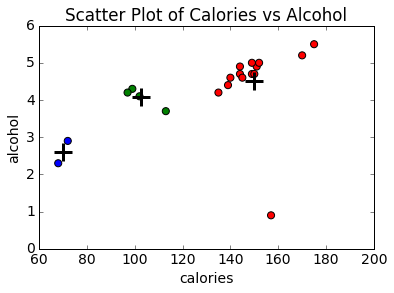

In [139]:
# TODO - scatter plot of calories versus alcohol, colored by cluster (0=red, 1=green, 2=blue)
# hint: color in a plot is usually specified with c=array
# Hopefully plotting is becoming familiar to you now!

plt.scatter(beer.calories, beer.alcohol, c=colors[beer.cluster], s=50)

# TODO - cluster centers, marked by "+"
# Just make sure you understand this command: 
# plt.scatter(centers.calories, centers.alcohol, linewidths=3, marker='+', s=300, c='black')

plt.scatter(centers.calories, centers.alcohol, linewidths=3, marker='+', s=300, c='black')

# TODO - always remember to add labels!

plt.xlabel('calories')
plt.ylabel('alcohol')
plt.title('Scatter Plot of Calories vs Alcohol')

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000000002F5720B8>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x0000000030BD0630>]], dtype=object)

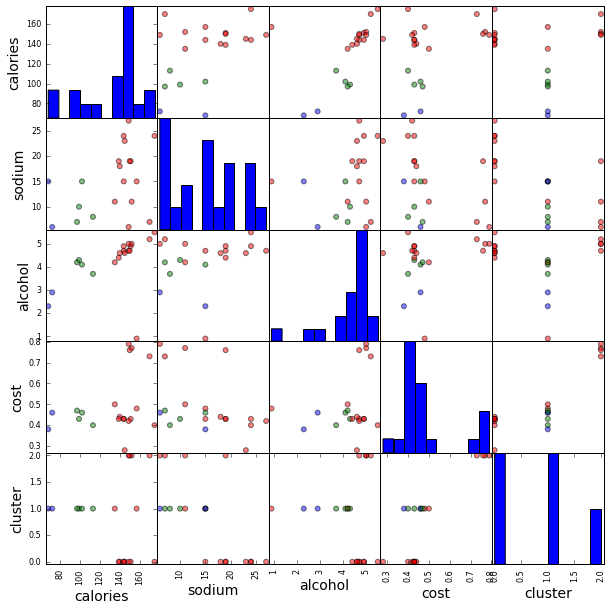

In [140]:
# TODO - scatter plot matrix (0=red, 1=green, 2=blue)
# Any observations?
# hint: figsize=(10,10), s=100, looks good

pd.scatter_matrix(X, c=colors[beer.cluster], figsize=(10,10), s=100)

### Repeat with scaled data

In [141]:
# center and scale the data

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [142]:
# TODO - repeat K-means with 3 clusters on scaled data
km = KMeans(n_clusters=3, random_state=1)
km.fit(X_scaled)

KMeans(copy_x=True, init='k-means++', max_iter=300, n_clusters=3, n_init=10,
    n_jobs=1, precompute_distances='auto', random_state=1, tol=0.0001,
    verbose=0)

In [143]:
# TODO - save the cluster labels and sort by cluster
beer['cluster'] = km.labels_
beer.sort('cluster')

C:\Users\Brandon\Anaconda2\lib\site-packages\ipykernel\__main__.py:3: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)
  app.launch_new_instance()


,name,calories,sodium,alcohol,cost,cluster
0,Budweiser,144,15,4.7,0.43,0
1,Schlitz,151,19,4.9,0.43,0
17,Heilemans_Old_Style,144,24,4.9,0.43,0
16,Hamms,139,19,4.4,0.43,0
5,Old_Milwaukee,145,23,4.6,0.28,0
6,Augsberger,175,24,5.5,0.40,0
7,Srohs_Bohemian_Style,149,27,4.7,0.42,0
10,Coors,140,18,4.6,0.44,0
15,Pabst_Extra_Light,68,15,2.3,0.38,1
12,Michelob_Light,135,11,4.2,0.50,1


What are the "characteristics" of each cluster?

In [145]:
# TODO - review the cluster centers
beer.groupby('cluster').mean()

,calories,sodium,alcohol,cost
cluster,,,,
0,148.375,21.125,4.7875,0.4075
1,105.375,10.875,3.3250,0.4475
2,155.250,10.750,4.9750,0.7625


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000000031900710>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x0000000032EAEDA0>]], dtype=object)

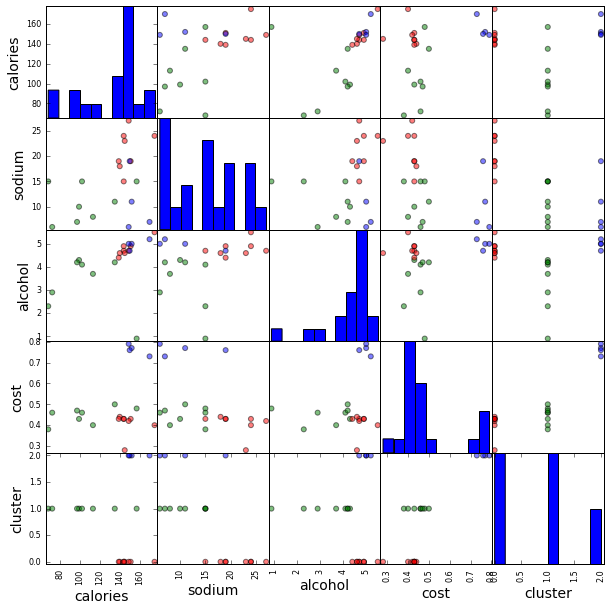

In [146]:
# TODO - scatter plot matrix of new cluster assignments (0=red, 1=green, 2=blue)
# pd.scatter_matrix(X, c=colors[beer.cluster], figsize=(10,10), s=100)
pd.scatter_matrix(X, c=colors[beer.cluster], figsize=(10,10), s=100)

Do you notice any cluster assignments that seem a bit odd? How might we explain those?

## Part 2: Clustering evaluation

The [Silhouette Coefficient](http://scikit-learn.org/stable/modules/clustering.html#silhouette-coefficient) is a common metric for evaluating clustering "performance" in situations when the "true" cluster assignments are not known.

A Silhouette Coefficient is calculated for **each observation**:

$$SC = \frac{b-a} {max(a, b)}$$

- a = mean distance to all other points in **its cluster**
- b = mean distance to all other points in **the next nearest cluster**

It ranges from -1 (worst) to 1 (best). A **global score** is calculated by taking the mean score for all observations.

In [117]:
# TODO - calculate SC for our model
from sklearn import metrics
metrics.silhouette_score(X_scaled, km.labels_)

0.52726482926608809

In [149]:
# TODO - calculate SC for K=2 through K=19

k_range = range(2, 20)
scores = []
for k in k_range:
    km = KMeans(n_clusters=k, random_state=1)
    km.fit(X_scaled)
    scores.append(metrics.silhouette_score(X_scaled, km.labels_))

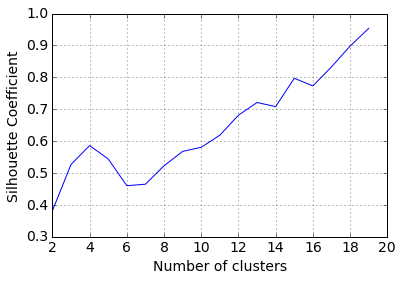

In [150]:
# TODO - plot the results (SC vs k)
# Don't forget to label!

plt.plot(k_range, scores)
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette Coefficient')
plt.grid(True)

## Part 3: DBSCAN clustering

In [156]:
# TODO - DBSCAN with eps=1 and min_samples=3

from sklearn.cluster import DBSCAN
db = DBSCAN(eps=1, min_samples=3)
db.fit(X_scaled)

DBSCAN(algorithm='auto', eps=1, leaf_size=30, metric='euclidean',
    min_samples=3, p=None, random_state=None)

In [157]:
# TODO - review the cluster labels

db.labels_

array([ 0,  0, -1,  1,  1, -1, -1,  0,  2,  2,  0,  2, -1, -1,  1, -1,  0,
        0, -1,  2], dtype=int64)

In [158]:
# save the cluster labels and sort by cluster
beer['cluster'] = db.labels_
beer.sort('cluster')

C:\Users\Brandon\Anaconda2\lib\site-packages\ipykernel\__main__.py:3: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)
  app.launch_new_instance()


,name,calories,sodium,alcohol,cost,cluster
2,Lowenbrau,157,15,0.9,0.48,-1
5,Old_Milwaukee,145,23,4.6,0.28,-1
6,Augsberger,175,24,5.5,0.40,-1
18,Olympia_Goled_Light,72,6,2.9,0.46,-1
12,Michelob_Light,135,11,4.2,0.50,-1
13,Becks,150,19,4.7,0.76,-1
15,Pabst_Extra_Light,68,15,2.3,0.38,-1
0,Budweiser,144,15,4.7,0.43,0
1,Schlitz,151,19,4.9,0.43,0
7,Srohs_Bohemian_Style,149,27,4.7,0.42,0


In [159]:
# review the cluster centers
beer.groupby('cluster').mean()

,calories,sodium,alcohol,cost
cluster,,,,
-1,128.857143,16.142857,3.585714,0.465714
0,144.500000,20.333333,4.700000,0.430000
1,157.000000,8.000000,5.066667,0.763333
2,102.750000,10.000000,4.075000,0.440000


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000000357A0978>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x000000003752FE80>]], dtype=object)

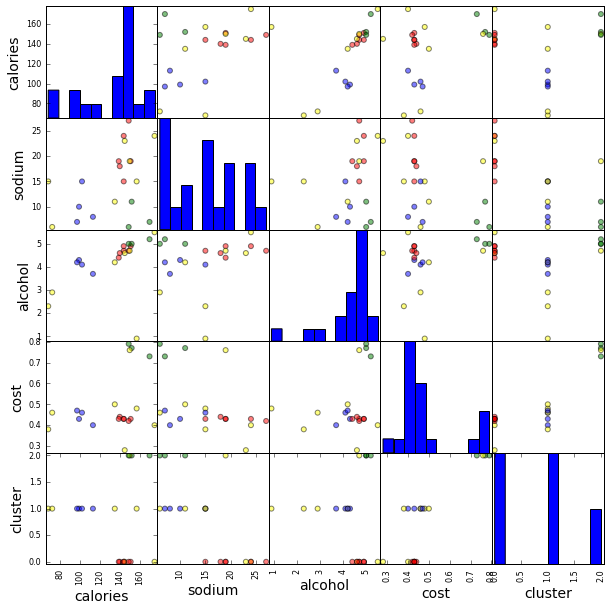

In [160]:
# TODO - scatter plot matrix of DBSCAN cluster assignments (0=red, 1=green, 2=blue, -1=yellow)
# pd.scatter_matrix(X, c=colors[beer.cluster], figsize=(10,10), s=100)

pd.scatter_matrix(X, c=colors[beer.cluster], figsize=(10,10), s=100)